# The Effects of the Coronavirus on the NYC Taxi Industry

The goal of this project is to answer a number of questions about the effects of the coronavirus on travel by taxi in NYC.

# Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import warnings

warnings.filterwarnings("ignore")

In [3]:
taxi_2019 = pd.read_csv('C:\\Users\\15164\\Desktop\\nyc-taxis-vs-covid\\data\\taxi_2019.csv')
taxi_2020 = pd.read_csv('C:\\Users\\15164\\Desktop\\nyc-taxis-vs-covid\\data\\taxi_2020.csv')

In [4]:
taxi_2019.head(2)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone,month,year
0,2019-03-22 08:22:39,2019-03-22 08:32:50,1.0,1.45,170,107,1.0,8.5,2.95,0.0,14.75,Friday,Murray Hill-Queens,Gravesend,March,2019
1,2019-03-21 15:31:46,2019-03-21 15:55:19,1.0,2.00,186,163,1.0,15.0,1.50,0.0,20.80,Thursday,Port Richmond,Midtown South,March,2019


In [5]:
taxi_2020.head(2)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone,month,year
0,2020-03-08 00:00:33,2020-03-08 00:11:14,2.0,1.06,148,4,1.0,8.0,2.36,0.0,14.16,Sunday,Madison,Arden Heights,March,2020
1,2020-03-08 00:02:10,2020-03-08 00:06:24,1.0,0.73,74,41,2.0,5.0,0.00,0.0,6.30,Sunday,East Harlem South,Central Harlem North,March,2020


# Question 1:
**1-** What has been the economic impact of COVID-19 on taxi revenue over time?

To properly answer this question, I will explore the following:

**How has the total amount paid per trip changed after the start of the pandemic?**

**Have tip amounts increased or decreased since the start of the pandemic?**

**How has the number of passengers per trip changed, if at all?**

### 1-How has the total amount paid per trip changed since the start of the pandemic?

In [8]:
amounts_19 = taxi_2019[['total_amount', 'month', 'year']]
amounts_19 = pd.DataFrame(amounts_19)
amounts_20 = taxi_2020[['total_amount', 'month', 'year']]
amounts_20 = pd.DataFrame(amounts_20)

In [14]:
amounts_months.to_csv("amounts_months")

In [9]:
amounts_months = pd.concat([amounts_19, amounts_20])
amounts_months.head(2)

,total_amount,month,year
0,14.75,March,2019
1,20.80,March,2019


In [13]:
plt.figure (figsize= (15,10))
sns.lineplot(data=amounts_months)

MemoryError: Unable to allocate 1.08 GiB for an array with shape (2, 72300568) and data type int64

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='month', ylabel='total_amount'>

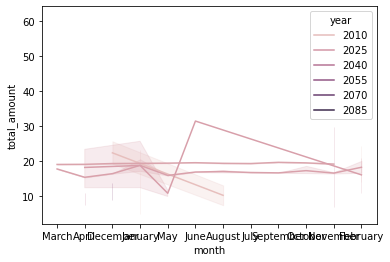

In [10]:
sns.lineplot(x='month', y='total_amount', hue='year', data=amounts_months)

KeyboardInterrupt: 

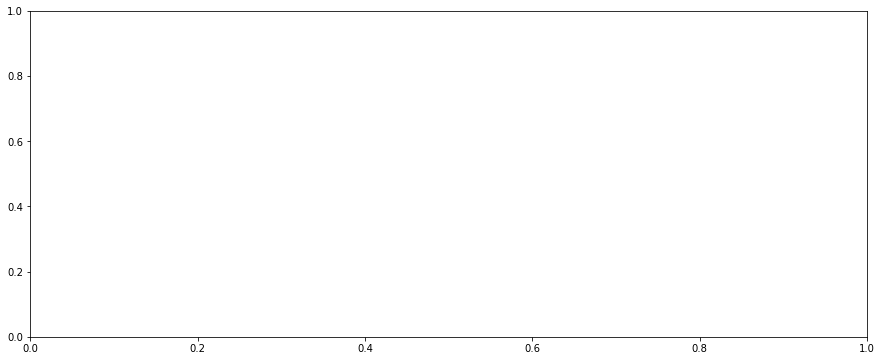

In [20]:
plt.figure(figsize = (15, 6))
n, bins, patches = plt.hist(amounts_months.total_amount, facecolor='green', alpha=0.75)
plt.xlabel('Total Amount (Fare, Surcharges, & Tips)')
plt.title('Total Amounts Paid in 2019 & 2020')
plt.xlim(0, 250)
plt.show();

# Question 2:
The first questions this analysis will answer are the following:

**1-** What was the most expensive trip before the pandemic and between what zones did it occur? 

**2-** What was the least expensive trip before the pandemic and where did it occur?

**3-** Conversely, what were the most and least expensive trips during the pandemic and between which zones did they occur?

### 1- What was the most expensive trip before the pandemic and between what zones?

In [7]:
most_expensive = taxi_2019.sort_values('total_amount', ascending=False)

In [8]:
most_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
34534253,2019-08-14 12:35:43,2019-08-14 13:00:06,1.0,7.0,138,15,3.0,411042.01,0.0,0.0,411042.81,Wednesday,Laurelton,Bayside


As we can see above, according to our data **the most expensive trip in 2019 occured on August 14th and was for a total amount of a whopping $411,042.81. It was between Laurelton and Bayside.**

It's however important to note that while this trip was recorded **it was not paid for**: according to our data dictionary, the payment_type '3.0' means that there was no charge. So while I will keep note of what the most expensive record is, I'd prefer to see what the most expensive trip **paid** for was. I will select the payment types of 1.0 and 2.0, since according to the dictionary these are for card and cash, respectively.

In [9]:
most_expensive = most_expensive.loc[most_expensive['payment_type'].isin([1.0, 2.0])]
most_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
23567858,2019-06-18 21:19:05,2019-06-18 21:45:13,1.0,5.6,229,256,1.0,9022.0,1624.64,0.0,10650.44,Tuesday,Times Sq/Theatre District,Windsor Terrace


These results show the following: **the most expensive paid trip was on June 18th for $10,650.44 and was between Times Square and Windsor Terrace. It lasted for about 26 minutes and was paid by card.**

### 2 - What was the least expensive trip before the pandemic and where did it occur?

To answer this question, I'll first select the trips that have a total amount greater than $0.00 because anything less most likely means that no actual trip was taken or they may have been an error in the data entry.

Then I'll sort my data in order from lowest 'total_amount' to highest and display the lowest entry only.

In [10]:
least_expensive = taxi_2019.sort_values('total_amount', ascending=True)

In [11]:
least_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
23413880,2019-06-18 09:43:26,2019-06-18 09:54:38,1.0,0.95,223,179,2.0,2.6,0.0,0.0,2.6,Tuesday,Stuy Town/Peter Cooper Village,Ozone Park


According to this, the least expensive trip was **$2.60 and occured on June 18th between Stuy Town/Peter Cooper Village and Ozone Park**. It lasted for 11 minutes.

### 3- What are the most and least expensive trips to occur during the peak of the pandemic (2020)?

#### Most expensive:

In [12]:
most_expensive = taxi_2020.sort_values('total_amount', ascending=False)

In [13]:
most_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
5234727,2020-10-07 10:35:56,2020-10-07 10:40:14,1.0,0.7,41,42,3.0,998310.03,0.0,0.0,998325.61,Wednesday,Central Harlem North,Central Park


As seen above, the most expensive trip during the peak of the pandemic was for **$998,310.03 and though it lasted for 5 minutes, it was *not* paid for. It occured between Central Harlem North and Central Park.** Given that there was no charge, it's most likely a dispute or a data entry error.

I will have a look at the most expensive ***paid*** trip for a more accurate result:

In [15]:
most_expensive2 = most_expensive.loc[most_expensive['payment_type'].isin([1.0, 2.0])]
most_expensive2.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
8616695,2020-12-20 23:01:34,2020-12-20 23:14:21,1.0,4.51,249,50,1.0,6964.0,1393.56,0.0,8361.36,Sunday,Westchester Village/Unionport,Co-Op City


**The most expensive paid trip was on December 20, 2020 for a total amount of $8361.36 and was between Westchester Village/Unionport and Co-Op City.** It lasted for just under 14 minutes and was paid by card.

#### Least Expensive:

In [16]:
least_expensive = taxi_2020.sort_values('total_amount', ascending=True)
least_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
388373,2020-03-10 13:09:47,2020-03-10 13:16:25,1.0,0.01,151,151,2.0,3.0,0.0,0.0,3.3,Tuesday,Manhattanville,Manhattanville


The least expensive trip occured within **one zone only, Manhattanville, and was $3.30**. While this trip lasted about 7 minutes and was paid in cash, it's possible that no trip taken given that the distance driven was only 0.01 mile; the rider (or driver) probably changed his/her mind before taking off.

So, I will find the least expensive ***paid*** trip with different pick up and drop off locations:

In [17]:
least_expensive = least_expensive.loc[least_expensive['PULocationID'] != least_expensive['DOLocationID']]
least_expensive = least_expensive.loc[least_expensive['payment_type'].isin([1.0, 2.0])]
least_expensive.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,day_of_week,Start_Zone,End_Zone
6516576,2020-11-03 08:18:08,2020-11-03 08:19:07,1.0,0.33,65,66,1.0,3.0,0.0,0.0,3.8,Tuesday,DUMBO/Vinegar Hill,Dyker Heights


**The cheapest trip occured on November 3, 2020, lasted for a minute, and cost a total amount of mere $3.80. It occured between the two zones of DUMBO/Vinegar Hill and Dyker Heights and was paid in card.** 

### Are there any major differences between pre-pandemic and peak pandemic most and least expensive trips?

While there was some difference between the most expensive trips of 2019 and 2020: **2,289 dollars**  between the most expensive and **$1.20** between the cheapest, there isn't enough information to effectively determine if whether or not COVID-19 influenced these specific charges or not. Additionally, while it is possible these high fares are accurate, it is also likely that there could be an error in these figures and thus, another reason why it is not possible to surely decide that the coronavirus affected these specific trips.

# Question 3:
**1-** What is the most popular payment method?

**2-** Did the pandemic affect the payment methods?

In [18]:
payment_type_count = taxi_2020['payment_type'].value_counts()
payment_types = pd.DataFrame(payment_type_count)
#Rename the columns
payment_types.reset_index(inplace=True)
payment_types = payment_types.rename(columns = {'index':'Payment Type', 'payment_type':'Count'})
payment_types.head(6)

,Payment Type,Count
0,1.0,6448984
1,2.0,2510880
2,3.0,37982
3,4.0,14545
4,5.0,1


In [81]:
data = {'Code':[1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
        'Payment':['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided Trip']}
  
data_dict = pd.DataFrame(data)
data_dict.set_index('Code', inplace=True)

Now that we have the counts of each, I will convert the codes into the actual names of the payment types. According to our data dictionary the following is true:

In [82]:
data_dict.head(6)

,Payment
Code,
1.0,Credit Card
2.0,Cash
3.0,No Charge
4.0,Dispute
5.0,Unknown
6.0,Voided Trip


In [19]:
# Converting to a string for easy manipulation
payment_types['Payment Type']= payment_types['Payment Type'].astype(str)

In [20]:
#Replacing the code numbers with the payment type
payment_types['Payment Type']= payment_types['Payment Type'].replace({'1.0': 'CreditCard', '2.0': 'Cash',
                                                                      '3.0': 'NoCharge','4.0': 'Dispute', 
                                                                      '5.0': 'Unknown', '6.0': 'VoidedTrip'})
payment_types.head()

,Payment Type,Count
0,CreditCard,6448984
1,Cash,2510880
2,NoCharge,37982
3,Dispute,14545
4,Unknown,1


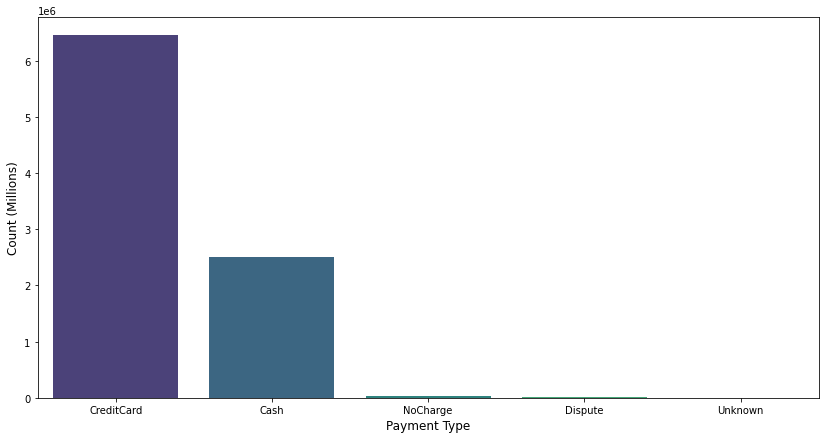

In [21]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=payment_types['Payment Type'], y=payment_types['Count'], palette='viridis')
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count (Millions)', fontsize=12)
plt.show()

To answer our first question: **credit cards have been the most popular payment method during the pandemic.**  It seems as if that is because of the general fear of germs spreading associated with exchanging money, so I will explore if the same held true  before the pandemic.

In [23]:
payment_type_count = taxi_2019['payment_type'].value_counts()
payment_types_pre = pd.DataFrame(payment_type_count)
#Rename the columns
payment_types_pre.reset_index(inplace=True)
payment_types_pre = payment_types_pre.rename(columns = {'index':'Payment Type', 'payment_type':'Count'})
#Converting the column values from an int64 to a string for easy manipulation
payment_types_pre['Payment Type']= payment_types_pre['Payment Type'].astype(str)
payment_types_pre['Payment Type']= payment_types_pre['Payment Type'].replace({'1.0': 'CreditCard', '2.0': 'Cash',
                                                                      '3.0': 'NoCharge','4.0': 'Dispute', 
                                                                      '5.0': 'Unknown', '6.0': 'VoidedTrip'})
payment_types_pre.head()

,Payment Type,Count
0,CreditCard,45764500
1,Cash,17230224
2,NoCharge,219818
3,Dispute,73633
4,Unknown,1


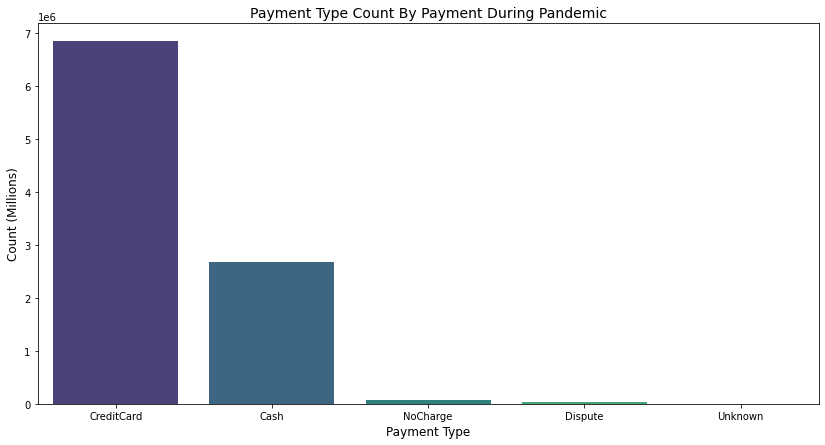

In [43]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=payment_types['Payment Type'], y=payment_types['Count'], palette='viridis')
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count (Millions)', fontsize=12)
plt.title('Payment Type Count By Payment During Pandemic', fontsize=14);
plt.show()

It seems that credit cards were the preferred payment type **even before the coronavirus took over.** I will plot both pre pandemic and peak pandemic to see how they compare to one another:

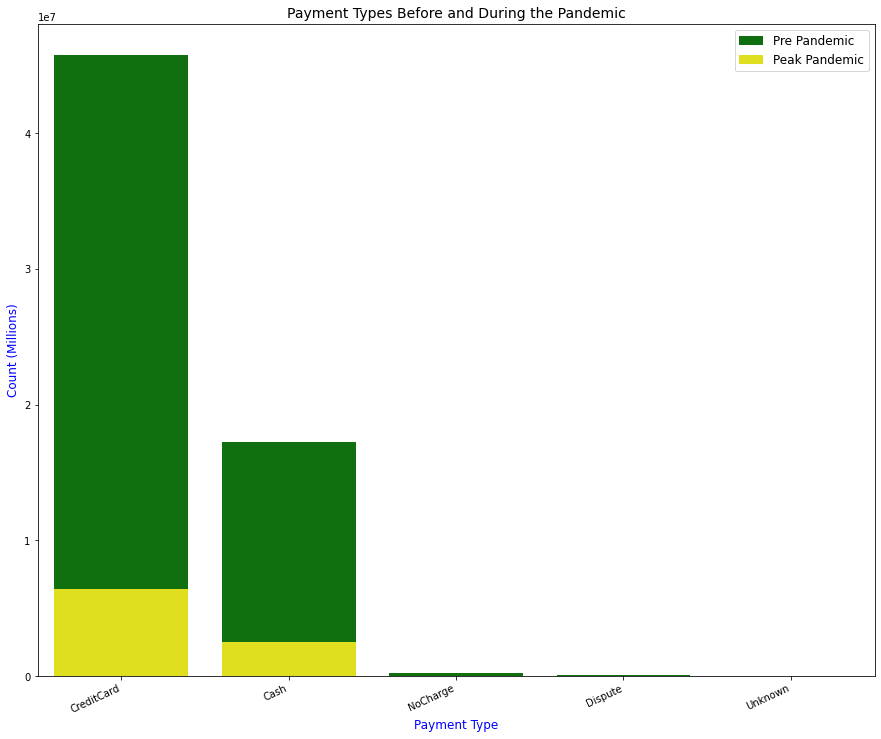

In [25]:
plt.figure(figsize=(15,12))
sns.barplot(x=payment_types_pre['Payment Type'], y=payment_types_pre['Count'], 
            color='green', label='Pre Pandemic')
sns.barplot(x=payment_types['Payment Type'], y=payment_types['Count'], 
            color='yellow', label='Peak Pandemic')
plt.xlabel('Payment Type', fontsize=12, color='blue')
plt.title("Payment Types Before and During the Pandemic", fontsize=14)
plt.ylabel('Count (Millions)', fontsize=12, color='blue')
plt.xticks(rotation=25, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12);

It's clear from the visualization above that yes, **credit cards have always been the most popular transaction method**. It's also abundantly clear that the **use of cash has significantly decreased since 2019, and that amount of taxi rides have declined drastically.** It is safe to say that COVID-19 has ***not*** affected the most popular payment method, but it has most likely decreased the use of cash.

# Question 4:

**1-** What is the most expensive day of the week to travel on?

**2-** Has the pandemic affected this or not?

### Pre-Pandemic:

In [70]:
#Making a new dataframe for the day of the week and fare amount columns
days_fares = taxi_2019[['day_of_week', 'fare_amount']]
days_fares = pd.DataFrame(days_fares)
days_fares = days_fares.rename(columns = {'day_of_week':'DayOfWeek', 'fare_amount':'Fare'})
#Grouping by the day of the week to find the average fare amount for each day
day_fare = days_fares.groupby('DayOfWeek')['Fare'].mean()
day_fare = pd.DataFrame(day_fare)
#Sorting from highest to lowest
day_fare = day_fare.sort_values('Fare', ascending=False)
day_fare.reset_index(inplace=True)
day_fare.head(7)

,DayOfWeek,Fare
0,Thursday,13.483865
1,Friday,13.339935
2,Monday,13.323022
3,Sunday,13.322426
4,Wednesday,13.256100
5,Tuesday,13.010589
6,Saturday,12.627430


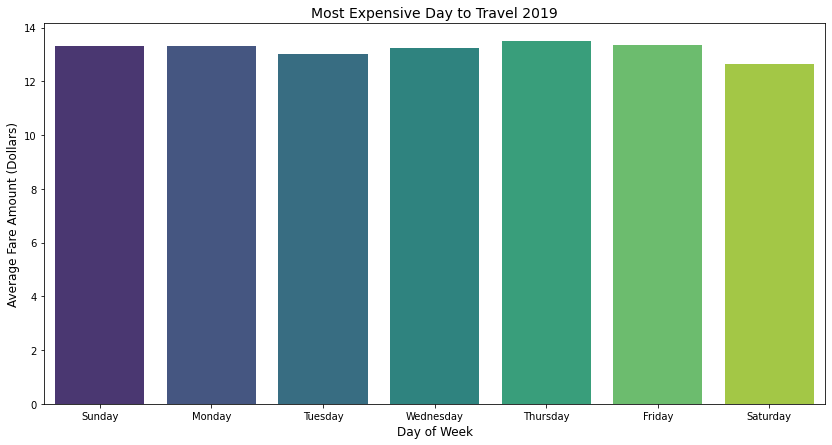

In [89]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=day_fare['DayOfWeek'], y=day_fare['Fare'], 
                  order = [ "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                  palette='viridis')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Fare Amount (Dollars)', fontsize=12)
plt.title('Most Expensive Day to Travel 2019', fontsize=14);
plt.show()

The most expensive day to travel before the pandemic was **Thursday**, with fares averaging about $0.15 more than other days. To determine if whether or not this has been affected by the pandemic, I'll repeat the steps above and plot the results for the data from 2020.

**Peak Pandemic**

In [60]:
days_fares = taxi_2020[['day_of_week', 'fare_amount']]
days_fares = pd.DataFrame(days_fares)
days_fares = days_fares.rename(columns = {'day_of_week':'DayOfWeek', 'fare_amount':'Fare'})
day_fare2 = days_fares.groupby('DayOfWeek')['Fare'].mean()
day_fare2 = pd.DataFrame(day_fare2)
day_fare2 = day_fare2.sort_values('Fare', ascending=False)
day_fare2.reset_index(inplace=True)
day_fare2.head()

,DayOfWeek,Fare
0,Sunday,11.876683
1,Wednesday,11.674069
2,Friday,11.272727
3,Monday,11.186411
4,Saturday,11.125573


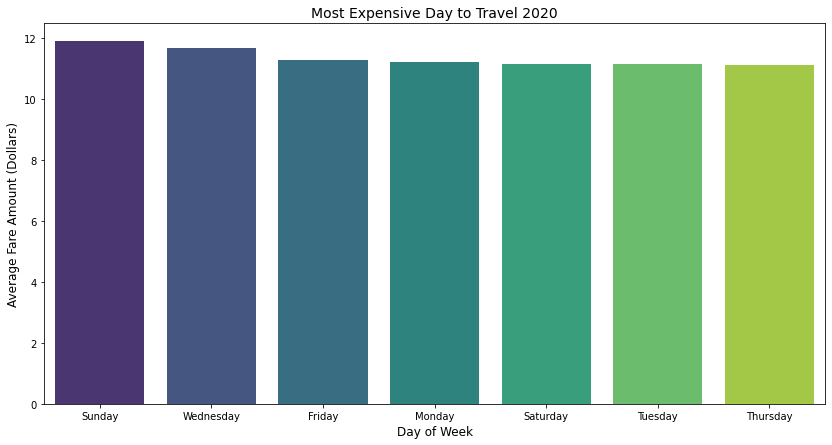

In [61]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=day_fare2['DayOfWeek'], y=day_fare2['Fare'], palette='viridis')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Fare Amount (Dollars)', fontsize=12)
plt.title('Most Expensive Day to Travel 2020', fontsize=14);
plt.show()

As is apparent in the above visualization, **Sunday** was the most expensive travel day during the pandemic, with fares averaging about $0.10 more than other days.

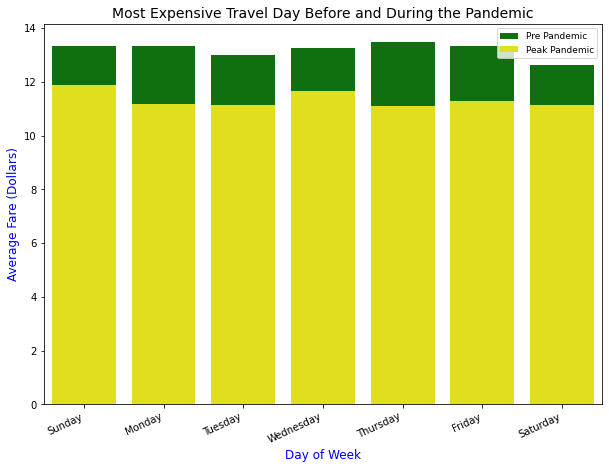

In [90]:
plt.figure(figsize=(10,7))
sns.barplot(x=day_fare['DayOfWeek'], y=day_fare['Fare'], 
            color='green', label='Pre Pandemic', 
           order = [ "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],)
sns.barplot(x=day_fare2['DayOfWeek'], y=day_fare2['Fare'], 
            color='yellow', label='Peak Pandemic',
           order = [ "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],)
plt.xlabel('Day of Week', fontsize=12, color='blue')
plt.title("Most Expensive Travel Day Before and During the Pandemic", fontsize=14)
plt.ylabel('Average Fare (Dollars)', fontsize=12, color='blue')
plt.xticks(rotation=25, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=9);

In [75]:
(day_fare['Fare'].mean()) - (day_fare2['Fare'].mean())

1.8555844189709685

As we can see above, we can confidently say that:

1- **The most expensive day to travel did change due to the pandemic.** 

2- **Fares have significantly changed (decreased) since pre-pandemic times by an average of $1.85.**